# Visualizing categorical data

## Categorical scatterplots:
`stripplot() (with kind="strip"; the default), 
swarmplot() (with kind="swarm")`
## Categorical distribution plots:
`boxplot() (with kind="box"), 
violinplot() (with kind="violin"), 
boxenplot() (with kind="boxen")`
## Categorical estimate plots:
`pointplot() (with kind="point"), 
barplot() (with kind="bar"), 
countplot() (with kind="count")`

## Categorical scatterplots
- The default representation of the data in catplot() uses a scatterplot. There are actually two different categorical scatter plots in seaborn. They take different approaches to resolving the main challenge in representing categorical data with a scatter plot, which is that all of the points belonging to one category would fall on the same position along the axis corresponding to the categorical variable. The approach used by stripplot(), which is the default “kind” in catplot() is to adjust the positions of points on the categorical axis with a small amount of random “jitter”:

In [2]:
import seaborn as sns

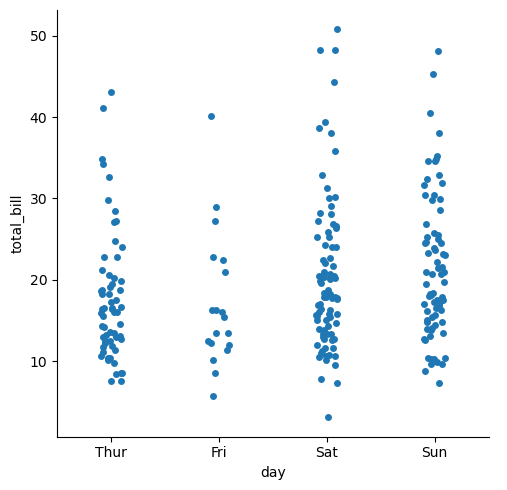

In [3]:
tips = sns.load_dataset("tips")
sns.catplot(data=tips, x="day", y="total_bill")

- The jitter parameter controls the magnitude of jitter or disables it altogether:

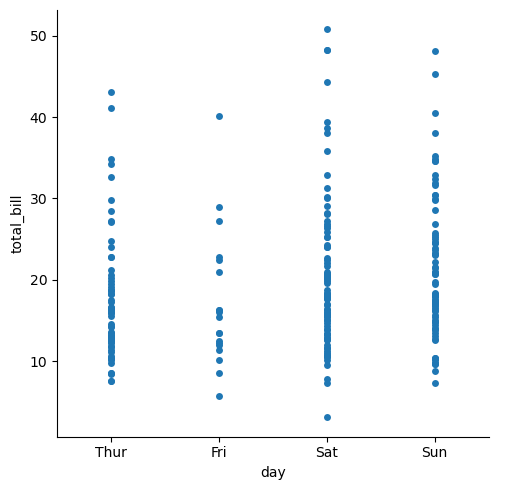

In [4]:
sns.catplot(data=tips, x="day", y="total_bill", jitter=False)

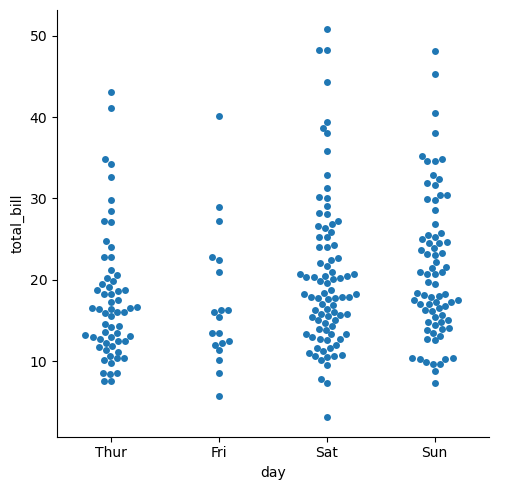

In [5]:
sns.catplot(data=tips, x="day", y="total_bill", kind="swarm")

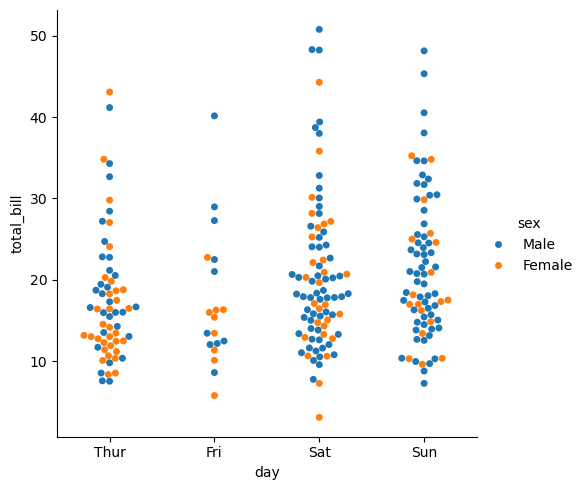

In [6]:
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="swarm")

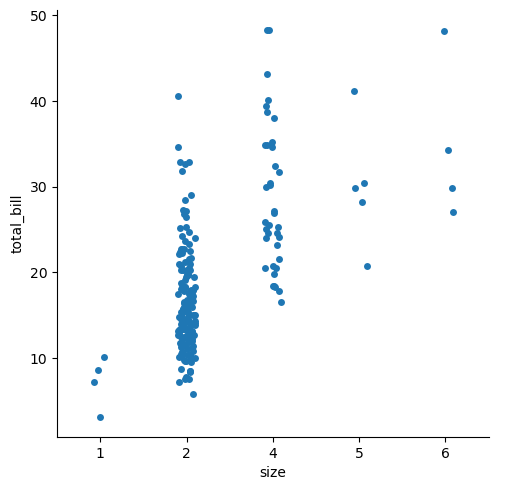

In [7]:
sns.catplot(data=tips.query("size != 3"), x="size", y="total_bill")

- all categorical plotting functions have a native_scale parameter, which can be set to True when you want to use numeric or datetime data for categorical grouping without changing the underlying data properties:

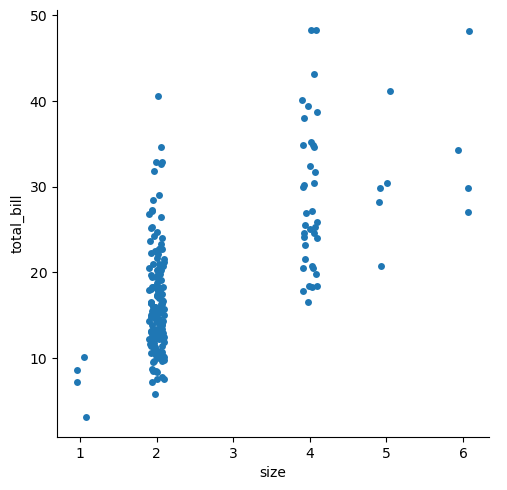

In [8]:
sns.catplot(data=tips.query("size != 3"), x="size", y="total_bill", native_scale=True)

- The other option for choosing a default ordering is to take the levels of the category as they appear in the dataset. The ordering can also be controlled on a plot-specific basis using the order parameter. This can be important when drawing multiple categorical plots in the same figure, which we’ll see more of below:

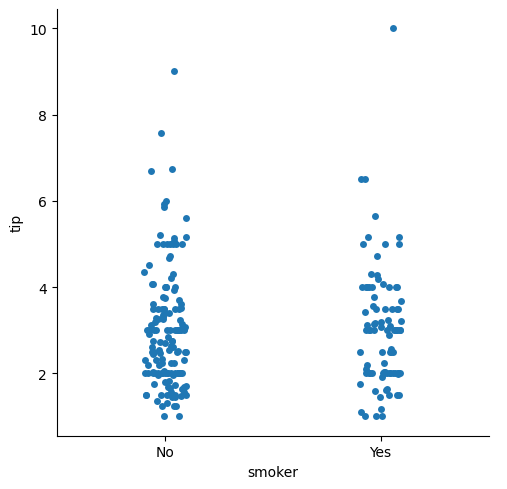

In [9]:
sns.catplot(data=tips, x="smoker", y="tip", order=["No", "Yes"])

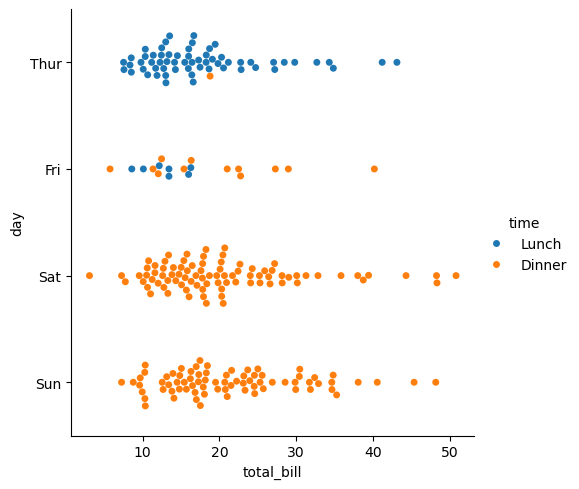

In [10]:
sns.catplot(data=tips, x="total_bill", y="day", hue="time", kind="swarm")

# Comparing distributions
- there are several approaches for summarizing the distributional information in ways that facilitate easy comparisons across the category levels.

## Boxplots
- The first is the familiar boxplot(). This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

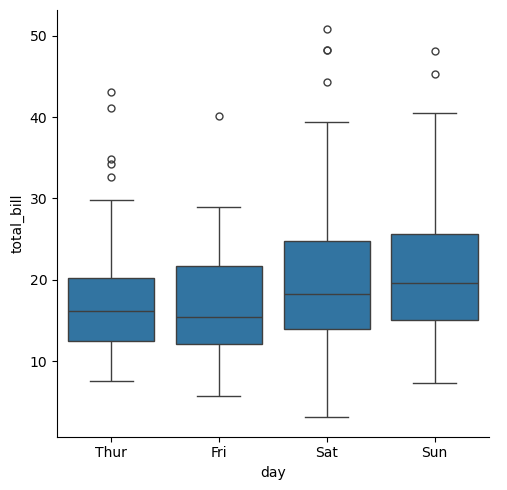

In [11]:
sns.catplot(data=tips, x="day", y="total_bill", kind="box")

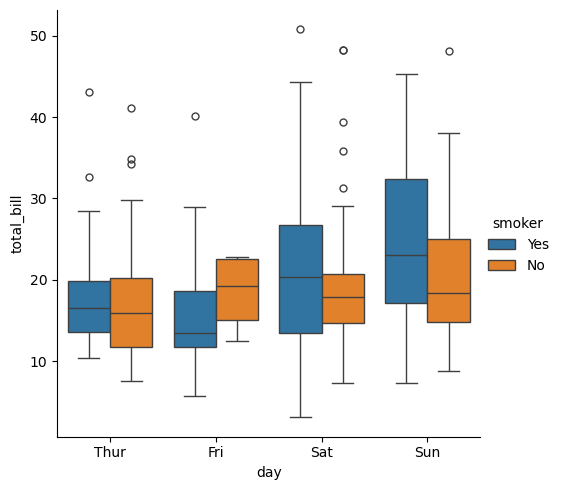

In [12]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="box")

- This behavior is called “dodging”, and it is controlled by the dodge parameter. By default (as of v0.13.0), elements dodge only if they would otherwise overlap:

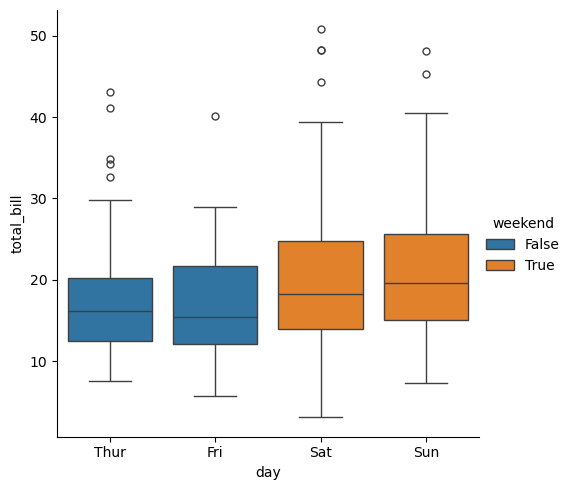

In [13]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(data=tips, x="day", y="total_bill", hue="weekend", kind="box")

- A related function, boxenplot(), draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets:

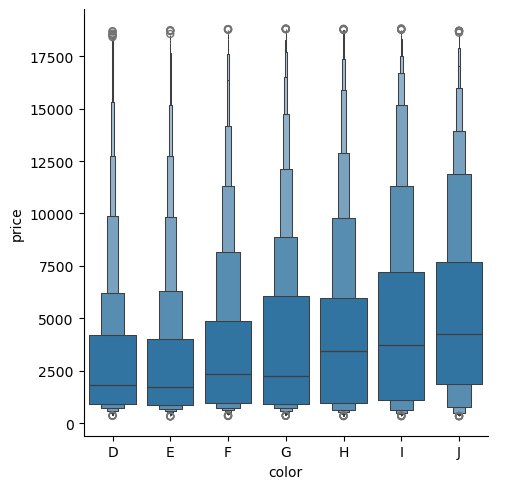

In [14]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(
    data=diamonds.sort_values("color"),
    x="color", y="price", kind="boxen",
)

## Violinplots
- A different approach is a violinplot(), which combines a boxplot with the kernel density estimation

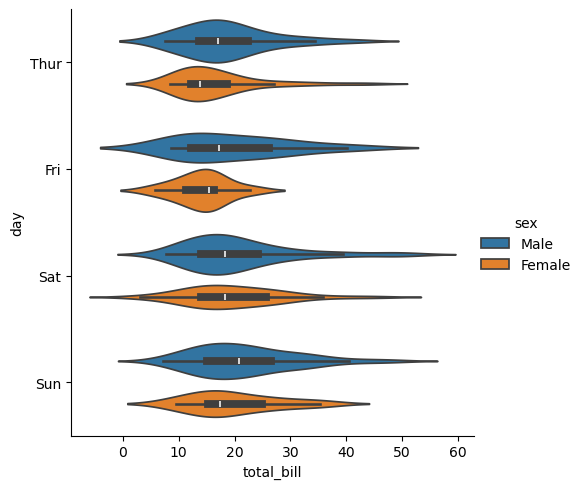

In [15]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex", kind="violin",
)

- This approach uses the kernel density estimate to provide a richer description of the distribution of values. Additionally, the quartile and whisker values from the boxplot are shown inside the violin. The downside is that, because the violinplot uses a KDE, there are some other parameters that may need tweaking, adding some complexity relative to the straightforward boxplot:

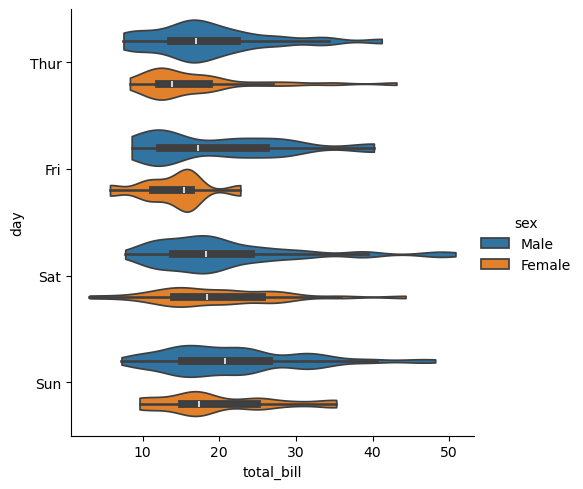

In [16]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex",
    kind="violin", bw_adjust=.5, cut=0,
)

- It’s also possible to “split” the violins, which can allow for a more efficient use of space:

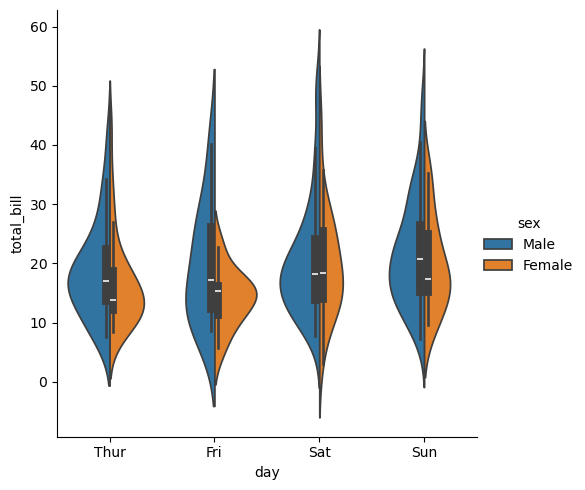

In [17]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",
    kind="violin", split=True,
)

- Finally, there are several options for the plot that is drawn on the interior of the violins, including ways to show each individual observation instead of the summary boxplot values:

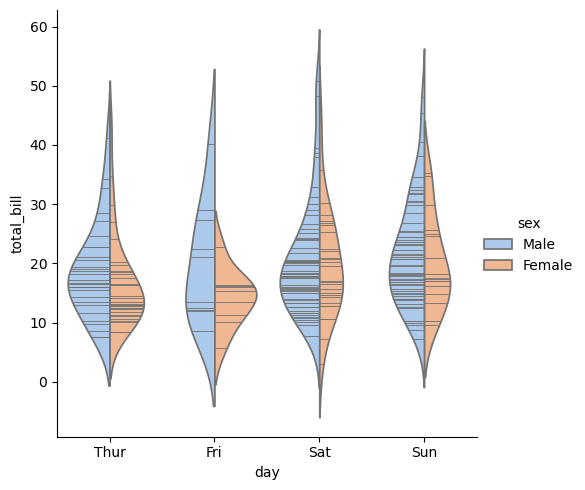

In [18]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",
    kind="violin", inner="stick", split=True, palette="pastel",
)

- It can also be useful to combine swarmplot() or stripplot() with a box plot or violin plot to show each observation along with a summary of the distribution:

<Axes: xlabel='day', ylabel='total_bill'>

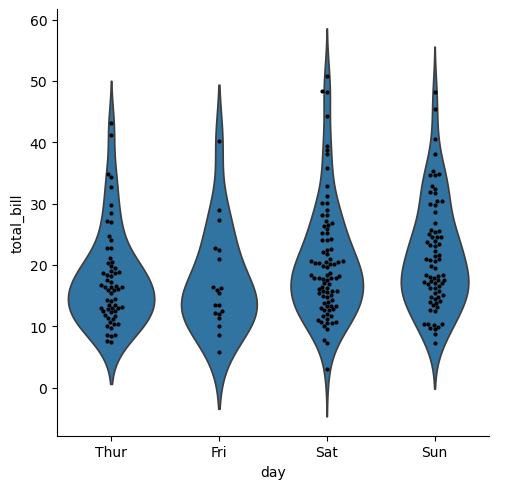

In [19]:
g = sns.catplot(data=tips, x="day", y="total_bill", kind="violin", inner=None)
sns.swarmplot(data=tips, x="day", y="total_bill", color="k", size=3, ax=g.ax)

# Estimating central tendency
- For other applications, rather than showing the distribution within each category, you might want to show an estimate of the central tendency of the values.
## Bar plots
- When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars:

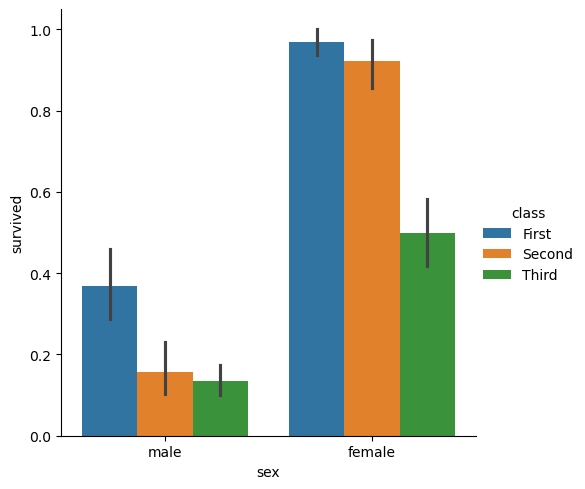

In [20]:
titanic = sns.load_dataset("titanic")
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="bar")

- The default error bars show 95% confidence intervals, but (starting in v0.12), it is possible to select from a number of other representations:

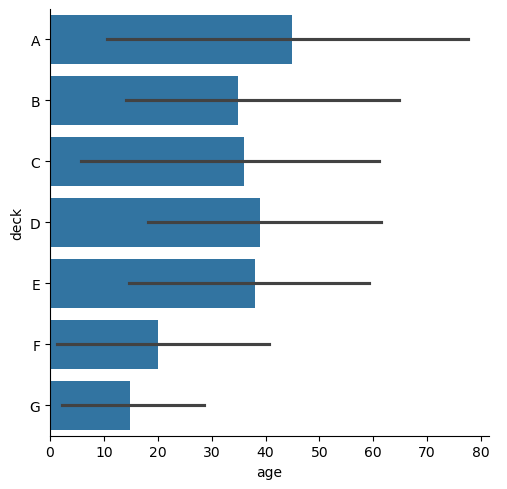

In [21]:
sns.catplot(data=titanic, x="age", y="deck", errorbar=("pi", 95), kind="bar")

- A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the countplot() function:

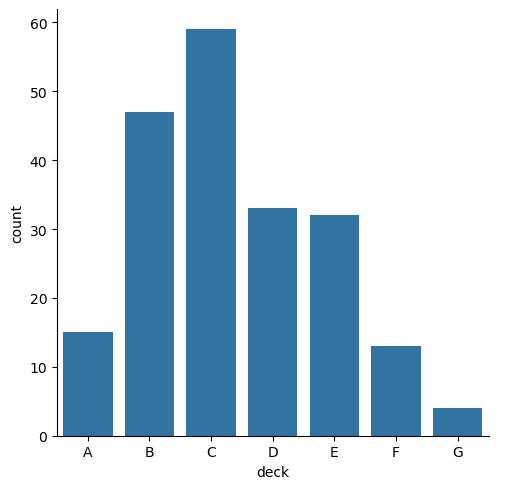

In [22]:
sns.catplot(data=titanic, x="deck", kind="count")

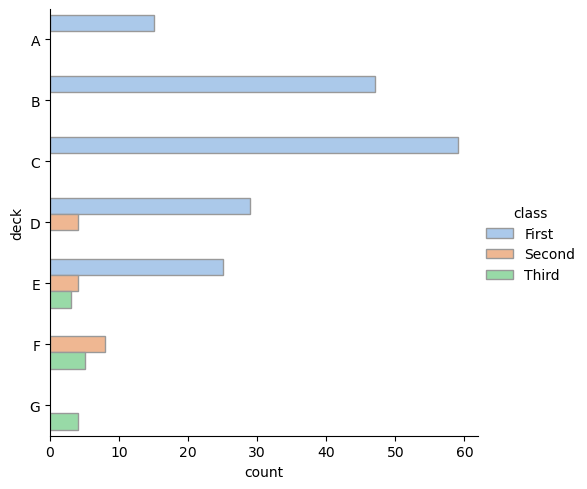

In [23]:
sns.catplot(
    data=titanic, y="deck", hue="class", kind="count",
    palette="pastel", edgecolor=".6",
)

## Point plots
- This function also encodes the value of the estimate with height on the other axis, but rather than showing a full bar, it plots the point estimate and confidence interval. Additionally, pointplot() connects points from the same hue category. This makes it easy to see how the main relationship is changing as a function of the hue semantic, because your eyes are quite good at picking up on differences of slopes:

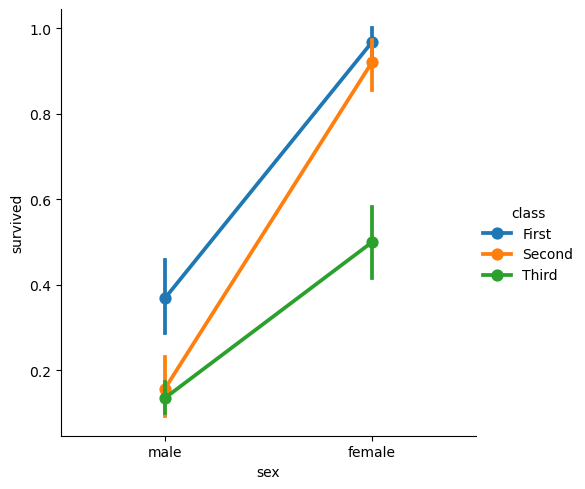

In [24]:
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="point")

- While the categorical functions lack the style semantic of the relational functions, it can still be a good idea to vary the marker and/or linestyle along with the hue to make figures that are maximally accessible and reproduce well in black and white:

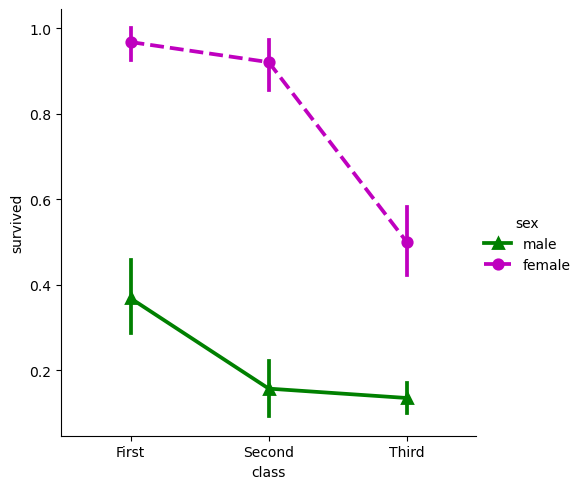

In [25]:
sns.catplot(
    data=titanic, x="class", y="survived", hue="sex",
    palette={"male": "g", "female": "m"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)

# Showing additional dimensions
- Just like relplot(), the fact that catplot() is built on a FacetGrid means that it is easy to add faceting variables to visualize higher-dimensional relationships:

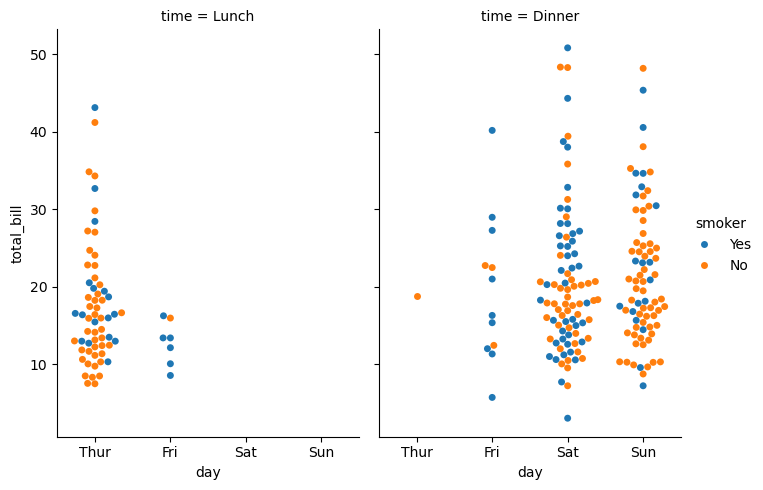

In [26]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="smoker",
    kind="swarm", col="time", aspect=.7,
)

- For further customization of the plot, you can use the methods on the FacetGrid object that it returns:

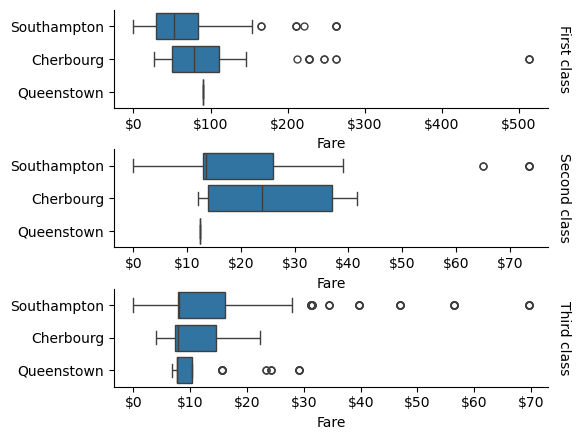

In [27]:
g = sns.catplot(
    data=titanic,
    x="fare", y="embark_town", row="class",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="Fare", ylabel="")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')